In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("IMDB Dataset.csv")

In [3]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [7]:
df['review'] = df['review'].apply(lambda x: x.replace("<br />", "").strip())

In [8]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [9]:
df['review'][1]

'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

In [10]:
df['review'] = df['review'].apply(lambda x: x.replace("\\", "").strip())

In [11]:
df['review'][1]

'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

In [12]:
import re

def clean_text(text):
    # This pattern keeps only letters (a-z, A-Z), numbers (0-9), and spaces.
    # It removes everything else (punctuation, special chars)
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

df['review'] = df['review'].apply(clean_text)


In [13]:
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download required NLTK data once
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_text(text):
    #  Lowercase
    text = text.lower()
    
    #  Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    
    #  Remove special characters and punctuation (keep only letters and spaces)
    text = re.sub(r'[^a-z\s]', '', text)
    
    #  Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    
    #  (Optional) Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join back to string
    return ' '.join(words)

# Example usage
sample_review = "<html>This movie was AWESOME!!! I loved it. :)</html>"
cleaned_review = preprocess_text(sample_review)
print(cleaned_review)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


movie awesome loved


In [14]:
df['review'] = df['review'].apply(preprocess_text)


# Text Vectorization

## TF-IDF Vectorization

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Example cleaned text data (list of strings)
corpus = df['review'].tolist()

# Initialize the vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the corpus to get TF-IDF features
X_tfidf = vectorizer.fit_transform(corpus)

# X_tfidf is a sparse matrix of shape (num_samples, num_features)
print(X_tfidf.shape)


(50000, 203292)


In [16]:
X_tfidf

<50000x203292 sparse matrix of type '<class 'numpy.float64'>'
	with 4825472 stored elements in Compressed Sparse Row format>

## Tokenizer + Padding (For Deep Learning models)

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

texts = df['review'].tolist()

# Create and fit tokenizer
tokenizer = Tokenizer(num_words=10000)  # limit vocab size
tokenizer.fit_on_texts(texts)

# Convert texts to sequences of token IDs
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to max length (e.g., 100 tokens)
X_padded = pad_sequences(sequences, maxlen=100, padding='post')

print(X_padded.shape)


(50000, 100)


# Splitting data

In [18]:
from sklearn.model_selection import train_test_split

X = df['review']
y = df['sentiment']


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y,   # optional but recommended for classification
    shuffle=True  # this is True by default
)



# Model Training 

In [19]:
from sklearn.base import BaseEstimator, TransformerMixin
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()

    def fit(self, X, y=None):
        return self  # Nothing to learn

    def transform(self, X):
        return [self._clean_text(text) for text in X]

    def _clean_text(self, text):
        # Lowercase
        text = text.lower()
        # Remove HTML
        text = BeautifulSoup(text, "html.parser").get_text()
        # Remove special chars (keep only a-z and spaces)
        text = re.sub(r'[^a-z\s]', '', text)
        # Tokenize
        words = word_tokenize(text)
        # Remove stopwords
        words = [w for w in words if w not in self.stop_words]
        # Lemmatize
        words = [self.lemmatizer.lemmatize(w) for w in words]
        return ' '.join(words)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('preprocess', TextPreprocessor()),
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

In [21]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocess', TextPreprocessor()),
                ('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [24]:
some_data = "A captivating and heartfelt story that beautifully captures the complexity of human emotions. The performances were outstanding, especially by the lead actor who brought depth and authenticity to the role. The cinematography and soundtrack complemented the narrative perfectly. Highly recommended for anyone who enjoys thoughtful dramas."

In [26]:
pipeline.predict([some_data])

array(['positive'], dtype=object)

In [28]:
another_data = "The movie was painfully slow and lacked any real substance. The plot was predictable and the characters felt one-dimensional. Despite some decent cinematography, the overall experience was disappointing and left me bored throughout."

In [29]:
pipeline.predict([another_data])

array(['negative'], dtype=object)

In [32]:
test_predict = pipeline.predict(X_test[:20])

In [36]:
from sklearn.naive_bayes import MultinomialNB


pipeline = Pipeline([
    ('preprocess', TextPreprocessor()),
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess', TextPreprocessor()),
                ('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [37]:
y_pred = pipeline.predict(X_test)

Accuracy: 0.8639
Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.88      0.87      5000
    positive       0.87      0.85      0.86      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



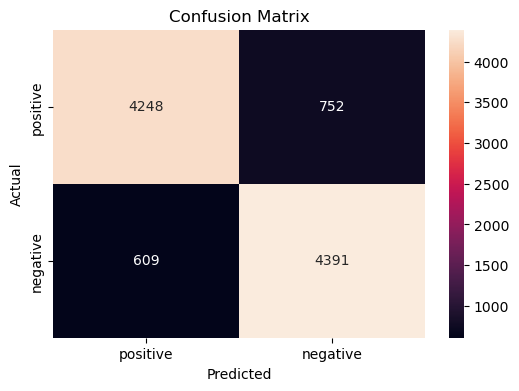

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_true = y_test.to_numpy()

# Accuracy
acc = accuracy_score(y_true, y_pred)
print(f"Accuracy: {acc:.4f}")

# Classification report (precision, recall, f1-score per class)
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=['positive', 'negative'])

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['positive', 'negative'], yticklabels=['positive', 'negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [43]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    # 'tfidf__max_df': [0.8, 0.9, 1.0],        # Ignore very common words
    # 'tfidf__min_df': [1, 5, 10],             # Ignore very rare words
    # 'tfidf__ngram_range': [(1,1), (1,2)],    # Unigrams or bigrams
    # 'clf__alpha': [0.01, 0.1, 0.5, 1.0]      # Smoothing parameter

    'tfidf__max_df': [0.9],               # just one value
    'tfidf__min_df': [5],                 # one value
    'tfidf__ngram_range': [(1,1)],       # unigrams only
    'clf__alpha': [0.1, 1.0]              # just two smoothing values
}

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=1)

# Fit on your training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best params:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END clf__alpha=0.1, tfidf__max_df=0.9, tfidf__min_df=5, tfidf__ngram_range=(1, 1); total time=  57.9s
[CV] END clf__alpha=0.1, tfidf__max_df=0.9, tfidf__min_df=5, tfidf__ngram_range=(1, 1); total time= 1.0min
[CV] END clf__alpha=0.1, tfidf__max_df=0.9, tfidf__min_df=5, tfidf__ngram_range=(1, 1); total time=  58.4s
[CV] END clf__alpha=0.1, tfidf__max_df=0.9, tfidf__min_df=5, tfidf__ngram_range=(1, 1); total time= 1.1min
[CV] END clf__alpha=0.1, tfidf__max_df=0.9, tfidf__min_df=5, tfidf__ngram_range=(1, 1); total time= 1.0min
[CV] END clf__alpha=1.0, tfidf__max_df=0.9, tfidf__min_df=5, tfidf__ngram_range=(1, 1); total time=  50.1s
[CV] END clf__alpha=1.0, tfidf__max_df=0.9, tfidf__min_df=5, tfidf__ngram_range=(1, 1); total time=  49.8s
[CV] END clf__alpha=1.0, tfidf__max_df=0.9, tfidf__min_df=5, tfidf__ngram_range=(1, 1); total time=  50.4s
[CV] END clf__alpha=1.0, tfidf__max_df=0.9, tfidf__min_df=5, tfidf__ngram_range=(1, 